# Activida 2. Técnicas avanzadas de programación

## Grupo 14

### Participantes:



## 1. Descripción del conjunto de datos

Para el trabajo se utiliza los datos sobre muerte del corazón en Sudáfrica (SAheart.csv). La variable que queremos predecir es chd que es un indicador de muerte coronaria basado en algunas variables predictivas (factores de riesgo) como son el fumado, la obesidad, las bebidas alcohólicas, entre otras. Las variables son:

sbp: systolic blood pressure

tobacco: cumulative tobacco (kg)

ldl: low density lipoprotein cholesterol

adiposity:

famhist: family history of heart disease (Present=1, Absent=0)

typea: type-A behavior

obesity

alcohol: current alcohol consumption

age: age at onset

chd: coronary heart disease (yes=1 or no=0)

## 2. Carga y limpieza de los datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [32]:
# Cargar el conjunto de datos 

os.getcwd()
datos= pd.read_csv("SAheart - SAheart.csv",sep=",")
datos.head(5)

sbp  tobacco   ldl  adiposity  famhist  typea  obesity  alcohol  age chd
0  160    12.00  5.73      23.11  Present     49    25.30    97.20   52  Si
1  144     0.01  4.41      28.61   Absent     55    28.87     2.06   63  Si
2  118     0.08  3.48      32.28  Present     52    29.14     3.81   46  No
3  170     7.50  6.41      38.03  Present     51    31.99    24.26   58  Si
4  134    13.60  3.50      27.78  Present     60    25.99    57.34   49  Si

In [8]:
datos.shape

(462, 10)

El conjunto de datos se compone de 462 observaciones y 10 columnas, las cuales se definieron anteriormente.

In [4]:
# Verificar la correcta lectura de las variables
datos.dtypes

sbp            int64
tobacco      float64
ldl          float64
adiposity    float64
famhist       object
typea          int64
obesity      float64
alcohol      float64
age            int64
chd           object
dtype: object

In [5]:
# Información de las variables

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 462 entries, 0 to 461
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sbp        462 non-null    int64  
 1   tobacco    462 non-null    float64
 2   ldl        462 non-null    float64
 3   adiposity  462 non-null    float64
 4   famhist    462 non-null    object 
 5   typea      462 non-null    int64  
 6   obesity    462 non-null    float64
 7   alcohol    462 non-null    float64
 8   age        462 non-null    int64  
 9   chd        462 non-null    object 
dtypes: float64(5), int64(3), object(2)
memory usage: 36.2+ KB


In [6]:
## Identificar valores perdidos
missing_data = datos.isnull()
missing_data.head(5)

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol    age  \
0  False    False  False      False    False  False    False    False  False   
1  False    False  False      False    False  False    False    False  False   
2  False    False  False      False    False  False    False    False  False   
3  False    False  False      False    False  False    False    False  False   
4  False    False  False      False    False  False    False    False  False   

     chd  
0  False  
1  False  
2  False  
3  False  
4  False

In [7]:
missing_data.sum(axis=0)

sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

De acuerdo con el procedimiento realizado y con los resultados generadors, se puede observar que el conjunto de datos no presenta valores perdidos.

## 3. Análsis descriptivo 

In [10]:
# Análisis descriptivo de las variables númericas

datos.describe()

sbp     tobacco         ldl   adiposity       typea     obesity  \
count  462.000000  462.000000  462.000000  462.000000  462.000000  462.000000   
mean   138.326840    3.635649    4.740325   25.406732   53.103896   26.044113   
std     20.496317    4.593024    2.070909    7.780699    9.817534    4.213680   
min    101.000000    0.000000    0.980000    6.740000   13.000000   14.700000   
25%    124.000000    0.052500    3.282500   19.775000   47.000000   22.985000   
50%    134.000000    2.000000    4.340000   26.115000   53.000000   25.805000   
75%    148.000000    5.500000    5.790000   31.227500   60.000000   28.497500   
max    218.000000   31.200000   15.330000   42.490000   78.000000   46.580000   

          alcohol         age  
count  462.000000  462.000000  
mean    17.044394   42.816017  
std     24.481059   14.608956  
min      0.000000   15.000000  
25%      0.510000   31.000000  
50%      7.510000   45.000000  
75%     23.892500   55.000000  
max    147.190000   64.000000

In [12]:
# Análisis descriptivo de las variables categóricas
datos.describe(include=['O'])

famhist  chd
count      462  462
unique       2    2
top     Absent   No
freq       270  302

In [13]:
datos['chd'].value_counts()

No    302
Si    160
Name: chd, dtype: int64

([<matplotlib.axis.XTick at 0x7f9efa757d60>,
 [Text(0, 0, 'No'), Text(1, 0, 'Si')])

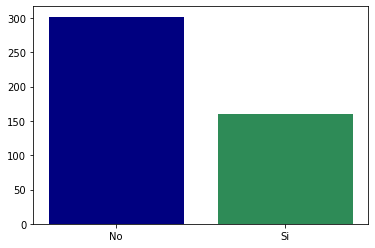

In [16]:
chd_no = datos['chd'].value_counts()[0]
chd_yes = datos['chd'].value_counts()[1]
np.arange(2)
plt.bar([0,1], [chd_no, chd_yes], color = ["navy", "seagreen"])
plt.xticks([0,1], ["No","Si"])

In [17]:
datos['famhist'].value_counts()

Absent     270
Present    192
Name: famhist, dtype: int64

([<matplotlib.axis.XTick at 0x7f9efa7ca3a0>,
 [Text(0, 0, 'Ausente'), Text(1, 0, 'Presente')])

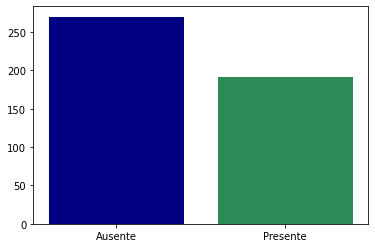

In [18]:
famhist_abs= datos['famhist'].value_counts()[0]
famhist_pres = datos['famhist'].value_counts()[1]
np.arange(2)
plt.bar([0,1], [famhist_abs, famhist_pres], color = ["navy", "seagreen"])
plt.xticks([0,1], ["Ausente","Presente"])

<AxesSubplot:>

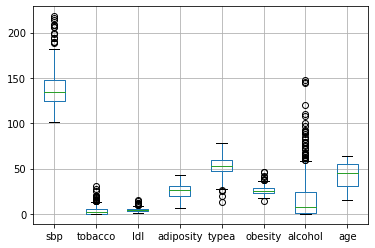

In [19]:
# Identificar casos atípicos
datos.boxplot()

En el gráfico anterior se puede observar el comportamiento de los datos atípicos de las variables númericas.

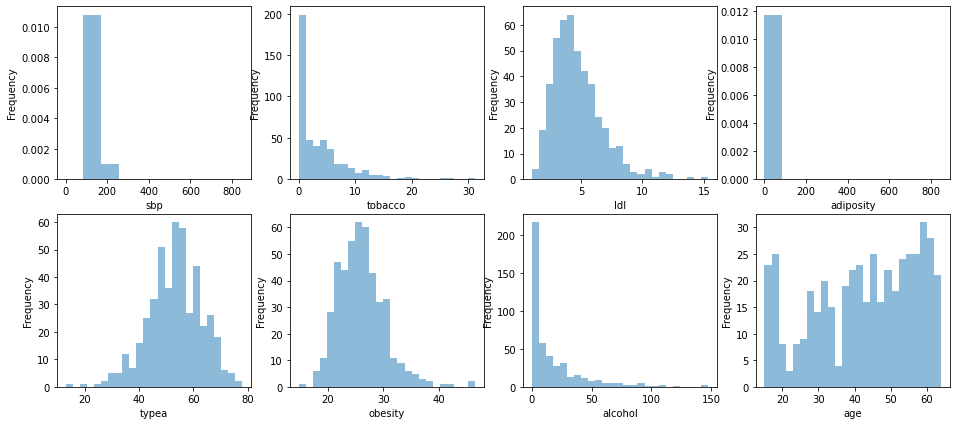

In [28]:
plt.figure(figsize=(16, 7))

plt.subplot(2,4,1)
datos['sbp'].plot.hist(alpha=0.5, bins=10, density=1, range = [0,850], grid = False)
plt.xlabel('sbp')

plt.subplot(2,4,2)
datos['tobacco'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('tobacco')

plt.subplot(2,4,3)
datos['ldl'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('ldl')


plt.subplot(2,4,4)
datos['adiposity'].plot.hist(alpha=0.5, bins=10, density=1, range = [0,850], grid = False)
plt.xlabel('adiposity')

plt.subplot(2,4,5)
datos['typea'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('typea')

plt.subplot(2,4,6)
datos['obesity'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('obesity')

plt.subplot(2,4,7)
datos['alcohol'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('alcohol')

plt.subplot(2,4,8)
datos['age'].plot.hist(alpha=0.5, bins=25, grid = False)
plt.xlabel('age')



plt.show()

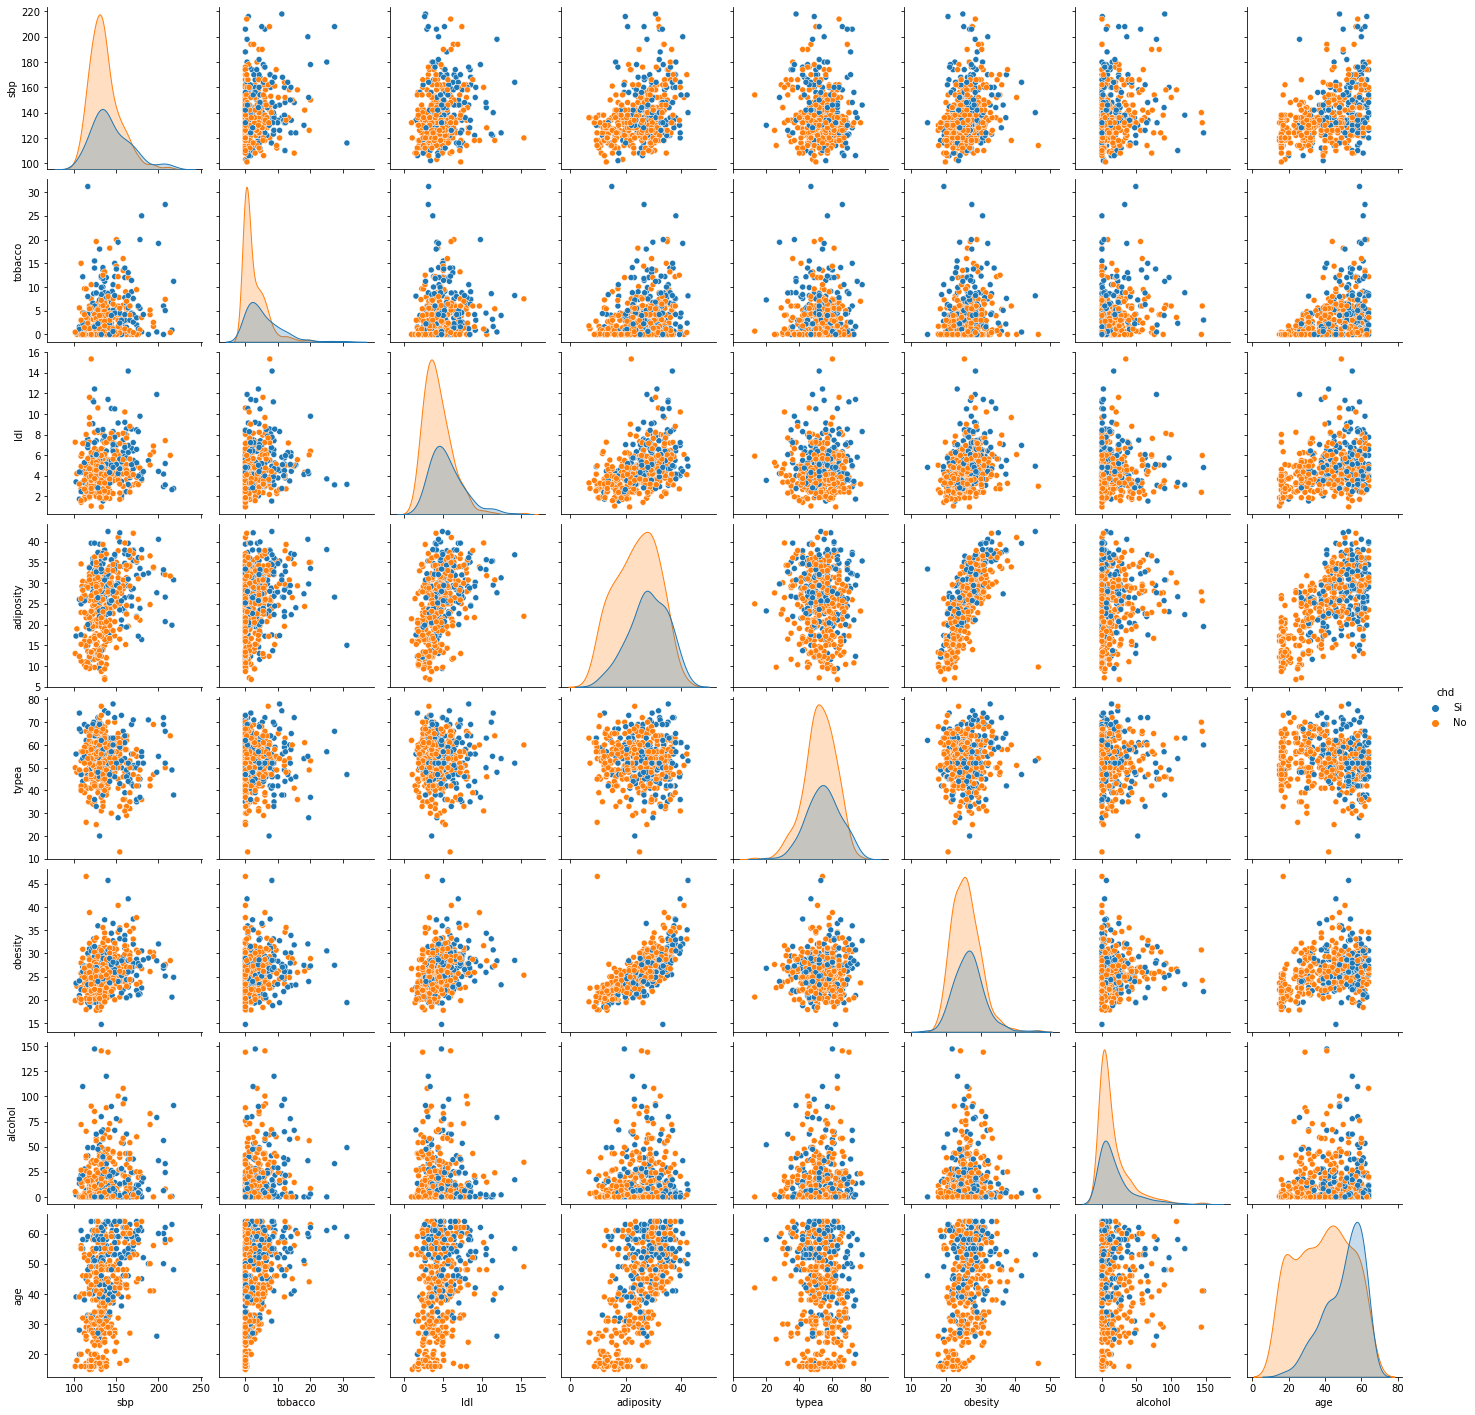

In [30]:
sns.pairplot(datos, hue="chd")

<AxesSubplot:>

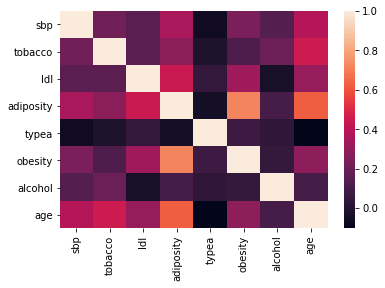

In [31]:
# Matriz de correlación

sns.heatmap(datos.corr())

De acuerdo con la matriz de correlación, se oberva que existen algunas correlaciones entre algunas características numéricas:

-adiposidad y obesidad

-adiposidad y edad

-tabaco y edad